<a href="https://colab.research.google.com/github/Pappas313/Computational-vision/blob/main/%CE%A5%CF%80%CE%BF%CE%BB%CE%BF%CF%83%CF%84%CE%B9%CE%BA%CE%AE_%CE%8C%CF%81%CE%B1%CF%83%CE%B7_%CE%95%CF%81%CE%B3%CE%B1%CF%83%CE%AF%CE%B1_1_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Άσκηση 5, Φιλτράρισμα στο πεδίο της συχνότητας:**

Θεωρήστε την εικόνα αποχρώσεων του γκρι (grayscale image) “lenna.bmp”. Προσθέστε στην εικόνα Γκαουσιανό θόρυβο με μέση τιμή μηδέν και διακύμανση 0.01.

**Ζητούμενα:**

**Α.** Τυπώστε την εικόνα πριν και μετά την προσθήκη του θορύβου.

**Β.** Θεωρήστε διαδοχικά χαμηλοπερατά φίλτρα Butterworth 3ης, 5ης και 7ης τάξης στο πεδίο της συχνότητας. Εφαρμόστε ξεχωριστά το κάθε φίλτρο στην εικόνα με θόρυβο (χρήση ευθύ και αντίστροφου μετασχηματισμού Fourier).

**Γ.** Τυπώστε σε ένα ενιαίο σχήμα την προκύπτουσα φιλτραρισμένη εικόνα για κάθε
περίπτωση χρησιμοποιούμενου φίλτρου και συγκρίνετε με την αρχική εικόνα. Τι
παρατηρείτε? Υπενθυμίζεται ότι το μιγαδικό μέρος της απόκρισης που προκύπτει από
την εφαρμογή του αντίστροφου μετασχηματισμού Fourier μπορεί να αγνοηθεί.

**Σημείση**

Καθώς αυξάνεται η τάξη του φίλτρου Butterworth, το φίλτρο γίνεται πιο επιλεκτικό όσον αφορά τις συχνότητες που επιτρέπει να περάσει.
Το φίλτρο 3ης τάξης θα έχει πιο ήπια αποκοπή, επιτρέποντας τη διέλευση περισσότερων στοιχείων που βρίσκονται στις υψηλές συχνότητες, με αποτέλεσμα ένα πιο ομαλό αλλά λιγότερο επιλεκτικό αποτέλεσμα φιλτραρίσματος.
Το φίλτρο 5ης τάξης θα παρέχει πιο απότομη αποκοπή, οδηγώντας σε καλύτερη καταστολή υψηλότερων συχνοτήτων και πιο ομαλό αποτέλεσμα από ένα φίλτρο 3ης τάξης.
Το φίλτρο 7ης τάξης θα έχει ακόμη πιο απότομο roll-off, με αποτέλεσμα την πιο απότομη αποκοπή των πληροφοριών της εικόνας στις υψηλής συχνότητας.


**Import Libraries**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [ ]:
def noise_image(image, mean=0, std=0.01):
    image = np.array(image)
    shape = image.shape
    noise = np.random.normal(mean, std, shape)
    noisy_image = np.clip(image + noise, 0, 255).astype(np.uint8)

    return noisy_image

def butterworth_low_pass_filter(image_fft, order, cutoff_freq):
    M,N = image_fft.shape
    H = np.zeros((M,N), dtype=np.float32)
    D0 = cutoff_freq
    n = order

    for u in range(M):
        for v in range(N):
            D = np.sqrt((u-M/2)**2 + (v-N/2)**2)
            H[u,v] = 1 / (1 + (D/D0)**(n))

    filtered_image_fft = image_fft * H
    filtered_image = np.abs(np.fft.ifft2(np.fft.ifftshift(filtered_image_fft)))

    return filtered_image

**Import Image**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
image_path_source = '/content/drive/My Drive/Υπολογιστική όραση/Dataset_01/lenna.bmp'

image = Image.open(image_path_source).convert('L')

noisy_image = noise_image(image)

image_fft = np.fft.fftshift(np.fft.fft2(image))
noisy_image_fft = np.fft.fftshift(np.fft.fft2(noisy_image))

filter_orders = [3, 5, 7]

Mounted at /content/drive


**Appear Graphs**

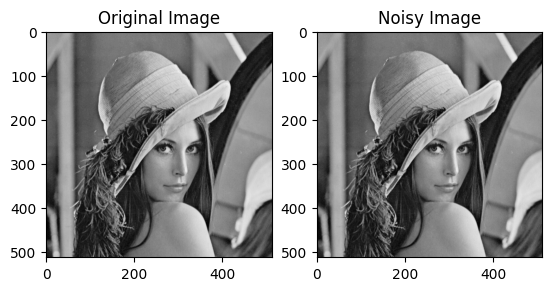

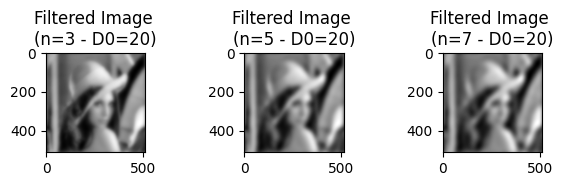

In [ ]:
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(noisy_image, cmap='gray')
plt.title('Noisy Image')

plt.show()

for i, filter_order in enumerate(filter_orders):
    filtered = butterworth_low_pass_filter(image_fft, filter_order, 10)
    plt.subplot(1, len(filter_orders), i + 1)
    plt.imshow(filtered, cmap='gray')
    plt.title(f'Filtered Image \n(n={filter_order} - D0={20})')
    plt.subplots_adjust(wspace=1, hspace=1)

plt.show()